# Deep Learning (Spring 2022) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include your written report, this notebook (.ipynb file), and a PDF of this notebook.

## Problem 1a)

### Imports

In [4]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [5]:
## Spectify Path to Provided Data Here
DATA_PATH = './fall22_hw4_prob1_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [ ]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """
    
    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """
    
    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

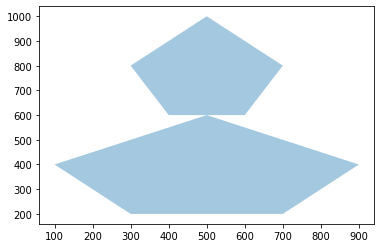

In [ ]:
visualize_polygons(p0,p1)

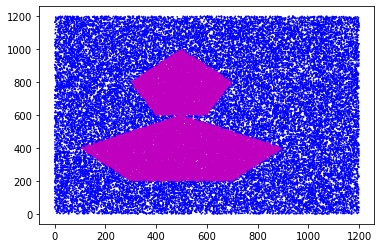

In [ ]:
visualize_datapoints(X, Y)

### Problem 1a) 

Please fill in all code blocks marked with a #TODO.

In [ ]:
def threshold_activation1(x):
    """
    
    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
    #TODO: Implement an "and" gate
    """
    # TODO:
    if all(x == np.ones_like(x)):
      y = 1
    else: 
      y = 0
    return y


def or_gate(x):
    """
    #TODO: Implement an "or" gate
    """
    # TODO:
    if all(x == np.zeros_like(x)):
      y = 0
    else:
      y =1
    return y


def analytical_parameters(p0, p1):
    """
    
    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b 

def predict_output_v1(X, W, b):
    """
    
    """
    predictions = []
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = 0*first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """
    
    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

Accuracy:  1.0


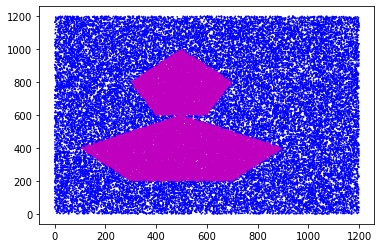

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

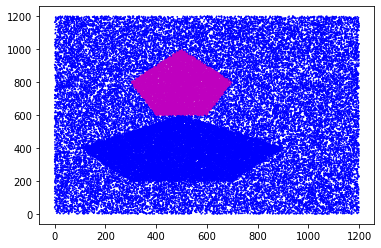

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.

### Problem 1b)

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms 
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
#dtype = torch.float
device = torch.device("cuda") #enable gpu

In [89]:
'''
STEP 1: LOAD DATASET
'''
train_x_temp = data[0:50000, :2]
train_y_temp = data[0:50000, 2]
test_x_temp = data[50000:,:2]
test_y_temp = data[50000:,2]

train_x = torch.from_numpy(train_x_temp).float()
test_x = torch.from_numpy(test_x_temp).float()
train_y = torch.from_numpy(train_y_temp).reshape(-1,1).float()
test_y = torch.from_numpy(test_y_temp).reshape(-1,1).float()

In [90]:
print(train_x_temp.dtype)
print(train_x.dtype) # before: torch.float64 #now: torch.float32
print(train_x.shape, test_x.shape)

float64
torch.float32
torch.Size([50000, 2]) torch.Size([10000, 2])


In [91]:
'''
STEP 2: MAKING DATASET ITERABLE
'''
batch_size = 256
num_epochs = 500
# n_iters = 250000
# num_epochs = n_iters / (len(train_x)/ batch_size) # num_epochs = 500
# num_epochs = int(num_epochs)

In [92]:
'''
STEP 3: CREATE MODEL 
'''
class MLP(nn.Module):
  def __init__(self, input_dim, hidden_dim1,hidden_dim2, output_dim):
    super(MLP, self).__init__()
    #Linear funciton
    self.fc1 = nn.Linear(input_dim, hidden_dim1)
    #Linear weight,W
    nn.init.xavier_normal_(self.fc1.weight)
    #Non-linearity
    self.sigmoid1 = nn.Sigmoid()
    #Another layer of linear funciton
    self.fc2 = nn.Linear(hidden_dim1,hidden_dim2)
    nn.init.xavier_normal_(self.fc2.weight)
    self.sigmoid2 = nn.Sigmoid()
    #Linear funciton(readout)
    self.fc3 = nn.Linear(hidden_dim2, output_dim)
    nn.init.xavier_normal_(self.fc3.weight)

  def forward(self,x):
    #Linear function
    out = self.fc1(x)
    #Non-linearity
    out = self.sigmoid1(out)
    #Another
    out = self.fc2(out)
    out = self.sigmoid2(out)
    #Linear funciton(readout)
    out = self.fc3(out)
    return out

In [93]:
'''
STEP 4: INSTANTIATE MODEL 
'''
input_dim = 2
hidden_dim1 = 10
hidden_dim2 = 2
output_dim = 1

In [94]:
'''
STEP 5: INSTANTIATE LOSS 
'''
criterion = nn.BCEWithLogitsLoss()

In [95]:
'''
STEP 6: INSTANTIATE OPTIMIZER 
'''
learning_rate = 0.001

In [101]:
'''
STEP 8: TRAIN THE MODEL
'''
# set seed
for i in range(5):
  torch.cuda.manual_seed(i)

  model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim)
  model.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  loss_history, train_acc_history, acc_history = [], [], []
  for epoch in range(num_epochs):
    #decay learning rate
    #scheduler.step()
    #print learning rate
    #print('Epoch:', epoch, 'LR:', scheduler.get_lr())
    # 8.1 convert inputs/labels to tensors with gradients
    rand_idx = torch.randperm(train_x.size(0))
    total_loss, correct = 0, 0
    for batch_x, batch_y in zip(torch.split(train_x[rand_idx].to(device), batch_size), 
                                torch.split(train_y[rand_idx].to(device), batch_size)):
      inputs = batch_x
      labels = batch_y
      # 8.2 clear gradients w.r.t. parameters
      optimizer.zero_grad()
      # 8.3 forward to get output
      outputs = model(inputs)
      # 8.4 caculate loss
      loss = criterion(outputs, labels)
      total_loss += loss.item() * inputs.size(0)
      predicted = (outputs > 0).to(train_y.dtype)
      correct += (predicted.cpu().reshape(-1,) == labels.cpu().reshape(-1,)).sum() 
      # 8.5 getting gradients w.r.t. parameters
      loss.backward()
      # 8.6 updating parameters
      optimizer.step()
    
    loss_history.append(total_loss / train_x.size(0))
    train_acc_history.append(correct / train_x.size(0))

    with torch.no_grad():
      test_inputs = test_x.to(device)
      test_labels = test_y.to(device)
      test_outputs = model(test_inputs)
      # get predictions from value
      predicted = (test_outputs > 0).to(test_y.dtype)
      total = test_labels.size(0)
      correct = (predicted.cpu().reshape(-1,) == test_labels.cpu().reshape(-1,)).sum()
      accuracy = 100 * correct.item() / total

    acc_history.append(accuracy)

    if (epoch + 1) % 500 == 0:
      print('epoch {}, loss {}, train accuracy {}, test accuracy {}'.format(epoch + 1, loss_history[-1], train_acc_history[-1], accuracy))

epoch 500, loss 0.1198075924706459, train accuracy 0.9561600089073181, test accuracy 96.1
epoch 500, loss 0.16216151634216308, train accuracy 0.9358800053596497, test accuracy 94.51
epoch 500, loss 0.11766921089172364, train accuracy 0.9559199810028076, test accuracy 96.04
epoch 500, loss 0.12970021333813667, train accuracy 0.9518200159072876, test accuracy 95.15
epoch 500, loss 0.15037661630392074, train accuracy 0.9434599876403809, test accuracy 92.77


In [102]:
avg_train_accuracy = np.mean([95.6, 93.6, 95.6, 95.2, 94.3])
std_train_accuracy = np.std([95.6, 93.6, 95.6, 95.2, 94.3])
print('mean of train accuracy {}'.format(avg_train_accuracy))
print('std of train accuracy {}'.format(std_train_accuracy))
avg_test_accuracy = np.mean([96.1, 94.51, 96.04, 95.15, 92.7])
std_test_accuracy = np.std([96.1, 94.51, 96.04, 95.15, 92.7])
print('mean of test accuracy {}'.format(avg_test_accuracy))
print('std of test accuracy {}'.format(std_test_accuracy))

std of train accuracy 0.7889233169326412
std of test accuracy 1.2485351416760353


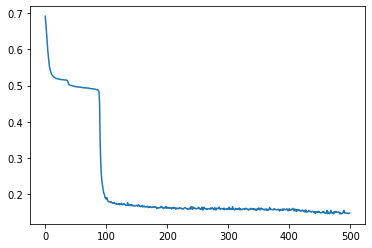

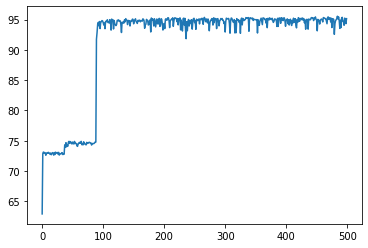

In [ ]:
plt.plot(range(500), loss_history)
plt.show()
plt.plot(range(500), acc_history)
plt.show()

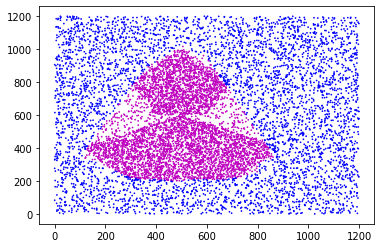

In [ ]:
## Visualize Predictions
visualize_datapoints(np.array(test_x.cpu()), np.array(predicted.cpu()).ravel())

### Problem 1c)

**Solution:** change from 2 hidden layers into 4 hidden layers where first layer has 20 neurons, second layer has 15 neurons, third layer has 10 neurons, forth layer has 5 neurons and final out layer has one layer plus binary cross entropy loss.  After adding hidden layers and num of neurons, the model has more capacity to model a more complicate model. 

In [103]:
'''
STEP 1: LOAD DATASET
'''
train_x_temp = data[0:50000, :2]
train_y_temp = data[0:50000, 2]
test_x_temp = data[50000:,:2]
test_y_temp = data[50000:,2]

train_x = torch.from_numpy(train_x_temp).float()
test_x = torch.from_numpy(test_x_temp).float()
train_y = torch.from_numpy(train_y_temp).reshape(-1,1).float()
test_y = torch.from_numpy(test_y_temp).reshape(-1,1).float()
'''
STEP 2: MAKING DATASET ITERABLE
'''
batch_size = 256
num_epochs = 500
# n_iters = 250000
# num_epochs = n_iters / (len(train_x)/ batch_size) # num_epochs = 500
# num_epochs = int(num_epochs)
'''
STEP 3: CREATE MODEL 
'''
class MLP(nn.Module):
  def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, output_dim):
    super(MLP, self).__init__()
    #Linear funciton
    self.fc1 = nn.Linear(input_dim, hidden_dim1)
    #Linear weight,W
    nn.init.xavier_normal_(self.fc1.weight)
    #Non-linearity
    self.sigmoid1 = nn.Sigmoid()
    #Another layer of linear funciton
    self.fc2 = nn.Linear(hidden_dim1,hidden_dim2)
    nn.init.xavier_normal_(self.fc2.weight)
    self.sigmoid2 = nn.Sigmoid()
    #Another layer of linear funciton
    self.fc3 = nn.Linear(hidden_dim2,hidden_dim3)
    nn.init.xavier_normal_(self.fc3.weight)
    self.sigmoid3 = nn.Sigmoid()
    #Another layer of linear funciton
    self.fc4 = nn.Linear(hidden_dim3,hidden_dim4)
    nn.init.xavier_normal_(self.fc4.weight)
    self.sigmoid4 = nn.Sigmoid()
    #Linear funciton(readout)
    self.fc5 = nn.Linear(hidden_dim4, output_dim)
    nn.init.xavier_normal_(self.fc5.weight)

  def forward(self,x):
    #Linear function
    out = self.fc1(x)
    #Non-linearity
    out = self.sigmoid1(out)
    #Another
    out = self.fc2(out)
    out = self.sigmoid2(out)
    out = self.fc3(out)
    out = self.sigmoid3(out)
    out = self.fc4(out)
    out = self.sigmoid4(out)
    #Linear funciton(readout)
    out = self.fc5(out)
    return out
'''
STEP 4: INSTANTIATE MODEL 
'''
input_dim = 2
hidden_dim1 = 20
hidden_dim2 = 15
hidden_dim3 = 10
hidden_dim4 = 5
output_dim = 1


'''
STEP 5: INSTANTIATE LOSS 
'''
criterion = nn.BCEWithLogitsLoss()
'''
STEP 6: INSTANTIATE OPTIMIZER 
'''
learning_rate = 0.001
'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
'''
STEP 8: TRAIN THE MODEL
'''
model_b = MLP(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, output_dim)
# model and tensors must be on GPU
model_b.to(device)

optimizer = torch.optim.Adam(model_b.parameters(), lr=learning_rate)
# set seed
for i in range(5):
  torch.cuda.manual_seed(i)
  loss_history, train_acc_history, acc_history = [], [], []
  for epoch in range(num_epochs):
    #decay learning rate
    #scheduler.step()
    #print learning rate
    #print('Epoch:', epoch, 'LR:', scheduler.get_lr())
    # 8.1 convert inputs/labels to tensors with gradients
    rand_idx = torch.randperm(train_x.size(0))
    total_loss, correct = 0, 0
    for batch_x, batch_y in zip(torch.split(train_x[rand_idx].to(device), batch_size), 
                                torch.split(train_y[rand_idx].to(device), batch_size)):
      inputs = batch_x
      labels = batch_y
      # 8.2 clear gradients w.r.t. parameters
      optimizer.zero_grad()
      # 8.3 forward to get output
      outputs = model_b(inputs)
      # 8.4 caculate loss
      loss = criterion(outputs, labels)
      total_loss += loss.item() * inputs.size(0)
      predicted = (outputs > 0).to(train_y.dtype)
      correct += (predicted.cpu().reshape(-1,) == labels.cpu().reshape(-1,)).sum() 
      # 8.5 getting gradients w.r.t. parameters
      loss.backward()
      # 8.6 updating parameters
      optimizer.step()
    
    loss_history.append(total_loss / train_x.size(0))
    train_acc_history.append(correct / train_x.size(0))

    with torch.no_grad():
      test_inputs = test_x.to(device)
      test_labels = test_y.to(device)
      test_outputs = model_b(test_inputs)
      # get predictions from value
      predicted = (test_outputs > 0).to(test_y.dtype)
      total = test_labels.size(0)
      correct = (predicted.cpu().reshape(-1,) == test_labels.cpu().reshape(-1,)).sum()
      accuracy = 100 * correct.item() / total

    acc_history.append(accuracy)

    if (epoch + 1) % 500 == 0:
      print('epoch {}, loss {}, train accuracy {}, test accuracy {}'.format(epoch + 1, loss_history[-1], train_acc_history[-1], accuracy))

epoch 500, loss 0.15685142531394958, train accuracy 0.9416199922561646, test accuracy 94.88
epoch 500, loss 0.1435339489746094, train accuracy 0.9506999850273132, test accuracy 95.87
epoch 500, loss 0.10183290070056915, train accuracy 0.9654800295829773, test accuracy 96.91
epoch 500, loss 0.056062713923454285, train accuracy 0.9790599942207336, test accuracy 96.65
epoch 500, loss 0.05035258489742875, train accuracy 0.9802600145339966, test accuracy 98.44


In [106]:
avg_train_accuracy = np.mean([94.2, 95.1, 96.5, 98.0, 98])
std_train_accuracy = np.std([94.2, 95.1, 96.5, 98.0, 98])
print('mean of train accuracy {}'.format(avg_train_accuracy))
print('std of train accuracy {}'.format(std_train_accuracy))
avg_test_accuracy = np.mean([94.88, 95.87, 97.0, 96.7, 98.4])
std_test_accuracy = np.std([94.88, 95.87, 97.0, 96.7, 98.4])
print('mean of test accuracy {}'.format(avg_test_accuracy))
print('std of test accuracy {}'.format(std_test_accuracy))


mean of train accuracy 96.36
std of train accuracy 1.5265647709809107
mean of test accuracy 96.57000000000001
std of test accuracy 1.1744615787670563


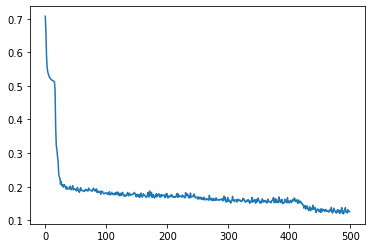

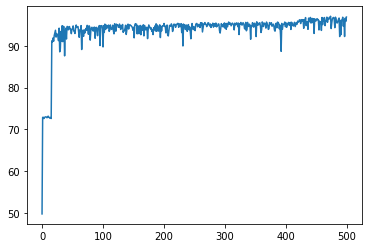

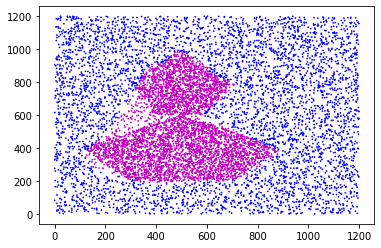

In [ ]:
plt.plot(range(500), loss_history)
plt.show()
plt.plot(range(500), acc_history)
plt.show()
## Visualize Predictions
visualize_datapoints(np.array(test_x.cpu()), np.array(predicted.cpu()).ravel())

### Problem 1d)

i don't think the test results are valid seems we used modified hyperparamter on test dataset and report it as our accuracy of model. We should seperate a new data in order to report accuracy of model. Also, it might not be generalizable as well seems we didn't add any regulization terms such as L1/L2 or drop out method

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [19]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST
from torch.utils.data.sampler import SubsetRandomSampler

### Data Loading

In [59]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 128
VAL_BATCH_SIZE = 512
TEST_BATCH_SIZE = 512

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

## Problem 2a)

### Design Model

In [66]:
class CNNet(nn.Module):
    
    """
    
    """
    
    def __init__(self):
        """
        
        """
        ## Inherent Torch Module
        super(CNNet, self).__init__()
        ##TODO: Initialize Model Layers
        # Convolution 1
        self.cnn = nn.Sequential(
            # 1x28x28
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='same'),
            nn.ReLU(),
            # 16x28x28
            nn.Conv2d(16, 8, 3, 1, 'same'),
            nn.ReLU(),
            # 8x28x28
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            # 8x14x14
            nn.Linear(8*14*14, 128),
            # 128
            nn.Linear(128, 10)
        )


    def forward(self, x):
        """
        
        """
        ##TODO: Setup Forward Pass
        out = self.cnn(x)
        return out

### Model Training

In [63]:
def train(model,
          optimizer,
          criterion,
          lr,
          epochs=5,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          device=device,
          **kwargs):
    """
    
    """
    model.to(device)
    loss_history, train_acc_history, val_acc_history = [], [], []
    ##TODO: Implement a training loop
    for epoch in range(epochs):
      model.train()
      total_loss, n_count, correct = 0., 0, 0
      for i, (images, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))
        total_loss += loss.item() * outputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted.cpu() == labels.cpu()).sum() 
        n_count += outputs.size(0)
        loss.backward()
        optimizer.step()

      loss_history.append(total_loss / n_count)
      train_acc_history.append(correct / n_count)

      with torch.no_grad():
        n_count, correct = 0, 0
        for i, (images, labels) in enumerate(val_dataloader):
          outputs = model(images.to(device))
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted.cpu() == labels).sum() 
          n_count += outputs.size(0)
        val_acc_history.append(correct / n_count)

      if (epoch+1) % 2 == 0:
        print('Epoch: {}. TrainLoss: {}. TrainAcc: {}. ValAcc: {}'.format(
            epoch+1, loss_history[-1], train_acc_history[-1], val_acc_history[-1]
        ))
    
    with torch.no_grad():
      n_count, correct = 0, 0
      for i, (images, labels) in enumerate(test_dataloader):
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted.cpu() == labels).sum() 
        n_count += outputs.size(0)
    test_acc = correct / n_count
    print("Test Acc: {}".format(test_acc))
        
    return loss_history, train_acc_history, val_acc_history, test_acc
                

In [69]:
## Hyperparameters
EPOCH = 50
LR = 0.001##TODO: Choose a Learning Rate

## Setting up the model, optimizer, and loss function
model = CNNet()
optimizer = torch.optim.Adam(model.parameters(),lr=LR)##TODO: Choose an optimized
loss_f = nn.CrossEntropyLoss(reduction='mean') ##TODO: Choose a loss

In [70]:
## Run Training Loop
out = train(model, optimizer, loss_f, LR, EPOCH)

Epoch: 2. TrainLoss: 0.35665850190162657. TrainAcc: 0.8745200037956238. ValAcc: 0.8686000108718872
Epoch: 4. TrainLoss: 0.29050798992156984. TrainAcc: 0.8952000141143799. ValAcc: 0.8928999900817871
Epoch: 6. TrainLoss: 0.2542918334531784. TrainAcc: 0.9088600277900696. ValAcc: 0.8995000123977661
Epoch: 8. TrainLoss: 0.23023600798606872. TrainAcc: 0.9168999791145325. ValAcc: 0.9032999873161316
Epoch: 10. TrainLoss: 0.21239788987874986. TrainAcc: 0.9232199788093567. ValAcc: 0.906000018119812
Epoch: 12. TrainLoss: 0.20347785744190217. TrainAcc: 0.9258000254631042. ValAcc: 0.8963000178337097
Epoch: 14. TrainLoss: 0.19158501083374024. TrainAcc: 0.9305400252342224. ValAcc: 0.90420001745224
Epoch: 16. TrainLoss: 0.17895283978939056. TrainAcc: 0.9344599843025208. ValAcc: 0.9089000225067139
Epoch: 18. TrainLoss: 0.17079631875991821. TrainAcc: 0.9371799826622009. ValAcc: 0.9077000021934509
Epoch: 20. TrainLoss: 0.16437990034103395. TrainAcc: 0.9401599764823914. ValAcc: 0.9039000272750854
Epoch: 2

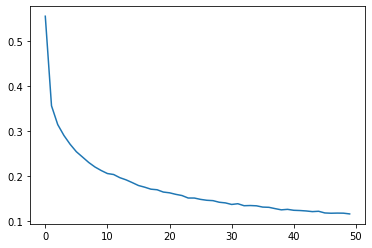

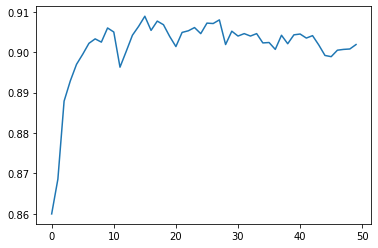

In [77]:
plt.plot(range(50), out[0])
plt.show()
plt.plot(range(50), out[2]) 
plt.show()

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [78]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 128
VAL_BATCH_SIZE = 512
TEST_BATCH_SIZE = 512

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])##TODO: Use the same from above or consider alternatives

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [81]:
##TODO: Try to improve upon your previous architecture
class CNNet(nn.Module):
    
    """
    add dropout (probability of an elment to be zeroed, 0.2) layer at third hidden linear layer;
    add batch normalization at first and second convolution neuron net
    """
    
    def __init__(self):
        """
        
        """
        ## Inherent Torch Module
        super(CNNet, self).__init__()
        ##TODO: Initialize Model Layers
        # Convolution 1
        self.cnn = nn.Sequential(
            # 1x28x28
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='same'),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            # 16x28x28
            nn.Conv2d(16, 8, 3, 1, 'same'),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            # 8x28x28
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            # 8x14x14
            nn.Linear(8*14*14, 128),
            nn.Dropout(p=0.2),
            # 128
            nn.Linear(128, 10)
        )


    def forward(self, x):
        """
        
        """
        ##TODO: Setup Forward Pass
        out = self.cnn(x)
        return out

### Model Training

In [82]:
##TODO: Fit and evaluate your model. What do you observe?
def train(model,
          optimizer,
          criterion,
          lr,
          epochs=5,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          device=device,
          **kwargs):
    """
    
    """
    model.to(device)
    loss_history, train_acc_history, val_acc_history = [], [], []
    ##TODO: Implement a training loop
    for epoch in range(epochs):
      model.train()
      total_loss, n_count, correct = 0., 0, 0
      for i, (images, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))
        total_loss += loss.item() * outputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted.cpu() == labels.cpu()).sum() 
        n_count += outputs.size(0)
        loss.backward()
        optimizer.step()

      loss_history.append(total_loss / n_count)
      train_acc_history.append(correct / n_count)

      with torch.no_grad():
        n_count, correct = 0, 0
        for i, (images, labels) in enumerate(val_dataloader):
          outputs = model(images.to(device))
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted.cpu() == labels).sum() 
          n_count += outputs.size(0)
        val_acc_history.append(correct / n_count)

      if (epoch+1) % 2 == 0:
        print('Epoch: {}. TrainLoss: {}. TrainAcc: {}. ValAcc: {}'.format(
            epoch+1, loss_history[-1], train_acc_history[-1], val_acc_history[-1]
        ))
    
    with torch.no_grad():
      n_count, correct = 0, 0
      for i, (images, labels) in enumerate(test_dataloader):
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted.cpu() == labels).sum() 
        n_count += outputs.size(0)
    test_acc = correct / n_count
    print("Test Acc: {}".format(test_acc))
        
    return loss_history, train_acc_history, val_acc_history, test_acc

In [83]:
## Hyperparameters
EPOCH = 50
LR = 0.001##TODO: Choose a Learning Rate

## Setting up the model, optimizer, and loss function
model = CNNet()
optimizer = torch.optim.Adam(model.parameters(),lr=LR)##TODO: Choose an optimized
loss_f = nn.CrossEntropyLoss(reduction='mean') ##TODO: Choose a loss

In [84]:
## Run Training Loop
out = train(model, optimizer, loss_f, LR, EPOCH)

Epoch: 2. TrainLoss: 0.31318321635246277. TrainAcc: 0.8889600038528442. ValAcc: 0.885699987411499
Epoch: 4. TrainLoss: 0.25562972288131713. TrainAcc: 0.9071000218391418. ValAcc: 0.9027000069618225
Epoch: 6. TrainLoss: 0.23371059685230255. TrainAcc: 0.9166399836540222. ValAcc: 0.9047999978065491
Epoch: 8. TrainLoss: 0.2120499040031433. TrainAcc: 0.922819972038269. ValAcc: 0.9039000272750854
Epoch: 10. TrainLoss: 0.19799553044319154. TrainAcc: 0.928059995174408. ValAcc: 0.8999000191688538
Epoch: 12. TrainLoss: 0.18313161044597626. TrainAcc: 0.9332600235939026. ValAcc: 0.90420001745224
Epoch: 14. TrainLoss: 0.17526890924930572. TrainAcc: 0.9345800280570984. ValAcc: 0.8970000147819519
Epoch: 16. TrainLoss: 0.1678680142211914. TrainAcc: 0.9388599991798401. ValAcc: 0.9020000100135803
Epoch: 18. TrainLoss: 0.16198740920066834. TrainAcc: 0.9402599930763245. ValAcc: 0.8967999815940857
Epoch: 20. TrainLoss: 0.15695388734340668. TrainAcc: 0.9430800080299377. ValAcc: 0.8934000134468079
Epoch: 22. 

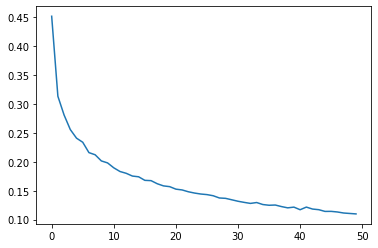

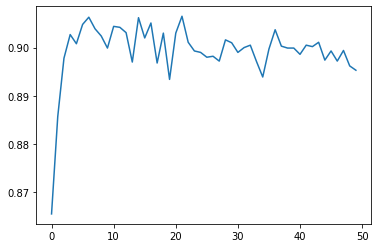

In [85]:
plt.plot(range(50), out[0])
plt.show()
plt.plot(range(50), out[2]) 
plt.show()

## Problem 2c)

Write down your response in the final report.